In [ ]:
def rgb_to_hsv(r, g, b):
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g-b)/df) + 360) % 360
    elif mx == g:
        h = (60 * ((b-r)/df) + 120) % 360
    elif mx == b:
        h = (60 * ((r-g)/df) + 240) % 360
    if mx == 0:
        s = 0
    else:
        s = (df/mx)*100
    v = mx*100
    return (int(h), int(s), int(v))
    

Text(0.5, 1.0, 'HSI')

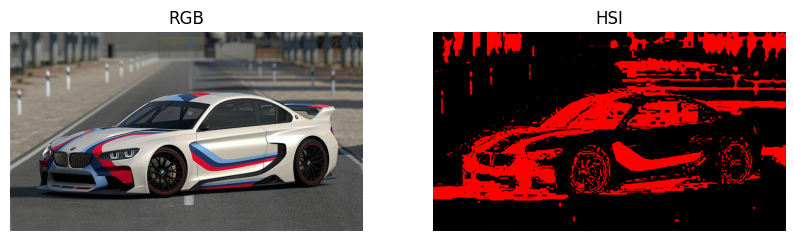

In [5]:
#RGB img to HSI
import numpy as np
import random
from PIL import Image, ImageDraw 
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

mu, sigma = 0, 0.1 # mean and standard deviation

image = Image.open("img_28.02.jpg") 
width = image.size[0]
height = image.size[1] 

pix = image.load()

imgnew = Image.new( mode = "RGB", size = (width, height), color = (0, 0, 0) )
imgnewpix=imgnew.load()


def rgb_to_hsi(r,g,b):
    r, g, b = r/255.0, g/255.0, b/255.0

    # H
    # h = np.arccos((0.5*((r-g)+(r-b)))/(np.sqrt((r-g)**2+(r-b)*(g-b))) + 1e-8)
    num = 0.5 * ((r - g) + (r - b))
    den = np.sqrt((r - g) ** 2 + (r - b) * (g - b))
    h = np.arccos(num / (den + 1e-8))
    if np.isnan([h]):
        # h = np.nan_to_num(h)
        h = 0

    #S
    if g<b :
        h= 360 - h
    s = 1 - (3 / (r + g + b + 1e-8)) * np.minimum(np.minimum(r, g), b)
    if s<0:
        s=abs(s)
    
    #I
    i = (r + g +b)/3

    return (int(h), int(s), int(i))

for i in range(width):
    for j in range(height):
        R = pix[i, j][0]
        G = pix[i, j][1]
        B = pix[i, j][2]
        imgnewpix[i, j] = rgb_to_hsi(R, G, B)
        # rgb_to_hsi(R, G, B)
        # imgnewpix[i, j] = rgb_to_hsi(pix[i, j])


fig = plt.figure(figsize=(10, 30))
rows, columns=(1,2)

fig.add_subplot(rows, columns, 1) 
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("RGB")

fig.add_subplot(rows, columns, 2) 
plt.imshow(imgnew, cmap='gray')
plt.axis('off')
plt.title("HSI")


In [ ]:
import cv2
import numpy as np
#cv2 is used for OpenCV library
image = cv2.imread("img_28.02.jpg")
#imread is use to read an image from a location
img = image.astype(np.float64)/255.
K = 1 - np.max(img, axis=2)
C = (1-img[...,2] - K)/(1-K)
M = (1-img[...,1] - K)/(1-K)
Y = (1-img[...,0] - K)/(1-K)

CMYK_image= (np.dstack((C,M,Y,K)) * 255).astype(np.uint8)
cv2.imshow("Original Image", image)
cv2.imshow("CMYK Image", CMYK_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0.5, 1.0, 'HSI')

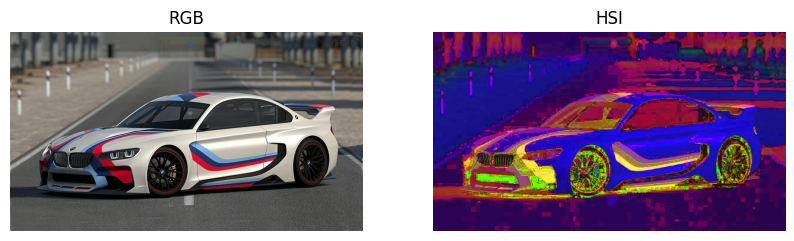

In [3]:
import numpy as np
from PIL import Image

def rgb_to_hsi(image):
    # Преобразование изображения в массив NumPy
    img_array = np.array(image)
    
    # Нормализация значений RGB
    img_array = img_array / 255.0
    
    # Разделение каналов RGB
    r, g, b = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]
    
    # Вычисление оттенка (H)
    num = 0.5 * ((r - g) + (r - b))
    den = np.sqrt((r - g) ** 2 + (r - b) * (g - b))
    h = np.arccos(num / (den + 1e-8))
    h[np.isnan(h)] = 0
    
    # Корректировка оттенка в зависимости от значения канала G
    h[b > g] = 2 * np.pi - h[b > g]
    h = h / (2 * np.pi)
    
    # Вычисление насыщенности (S)
    s = 1 - (3 / (r + g + b + 1e-8)) * np.minimum(np.minimum(r, g), b)
    
    # Вычисление интенсивности (I)
    i = (r + g + b) / 3
    
    # Преобразование значений HSI в диапазон [0, 255]
    h = h * 255
    s = s * 255
    i = i * 255
    
    # Создание нового изображения HSI
    hsi_image = np.zeros_like(img_array)
    hsi_image[:, :, 0] = h
    hsi_image[:, :, 1] = s
    hsi_image[:, :, 2] = i
    
    # Преобразование массива NumPy в изображение PIL
    hsi_image = Image.fromarray(hsi_image.astype(np.uint8))
    
    return hsi_image

# Загрузка изображения RGB
rgb_image = Image.open("img_28.02.jpg")

# Преобразование изображения в HSI
hsi_image = rgb_to_hsi(rgb_image)

# Отображение изображений

fig = plt.figure(figsize=(10, 30))
rows, columns=(1,2)

fig.add_subplot(rows, columns, 1) 
plt.imshow(rgb_image, cmap='gray')
plt.axis('off')
plt.title("RGB")

fig.add_subplot(rows, columns, 2) 
plt.imshow(hsi_image, cmap='gray')
plt.axis('off')
plt.title("HSI")

Text(0.5, 1.0, 'I')

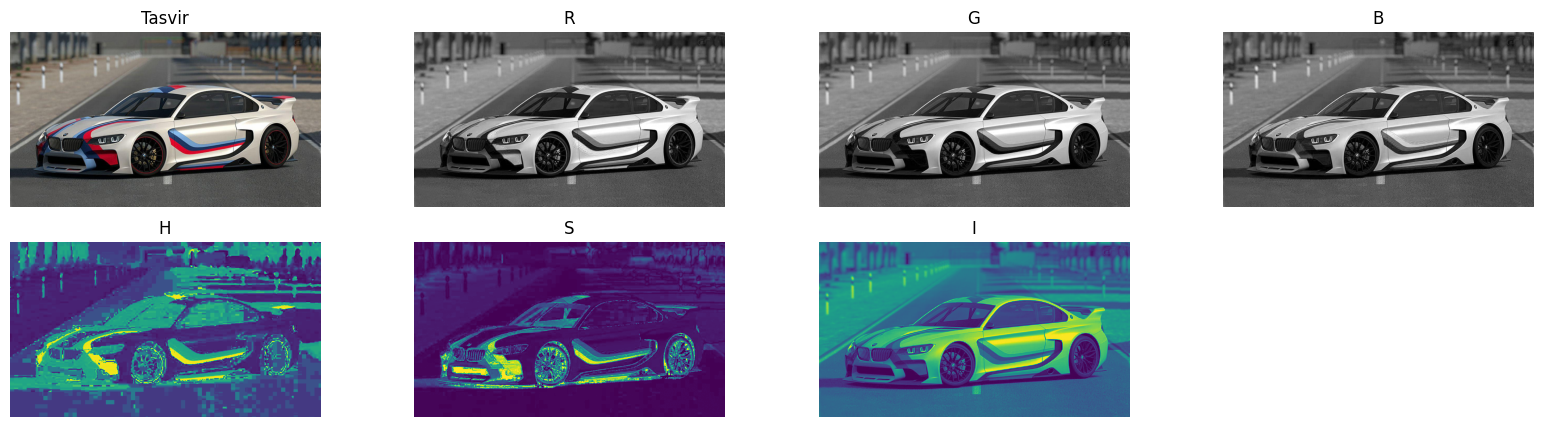

In [44]:
#IMpuls shovqini qo`shish va mediana filrt bilan ishlov berish
import numpy as np
import random
from PIL import Image, ImageDraw #Подключим необходимые библиотеки. 
import math

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

mu, sigma = 0, 0.1 # mean and standard deviation


f = Image.open("img_28.02.jpg") 
M = f.size[1] #Определяем ширину. 
N = f.size[0] #Определяем высоту. 

noisy_image = np.array(f)
fig = plt.figure(figsize=(20, 5))
rows, columns=(2, 4)


fig.add_subplot(rows, columns, 1) 
plt.imshow(f)
plt.axis('off')
plt.title("Tasvir")

fig.add_subplot(rows, columns, 2) 
plt.imshow(noisy_image[:,:,0], cmap='gray')
plt.axis('off')
plt.title("R")

fig.add_subplot(rows, columns, 3) 
plt.imshow(noisy_image[:,:,1], cmap='gray')
plt.axis('off')
plt.title("G")

fig.add_subplot(rows, columns, 4) 
plt.imshow(noisy_image[:,:,2], cmap='gray')
plt.axis('off')
plt.title("B")


def rgb_to_hsi(img):
  zmax = 255 # max value
  # values in [0,1]
  R = np.divide(img[:,:,0],zmax,dtype=np.float)
  G = np.divide(img[:,:,1],zmax,dtype=np.float)
  B = np.divide(img[:,:,2],zmax,dtype=np.float)

  # Hue, when R=G=B -> H=90
  a = (0.5)*np.add(np.subtract(R,G), np.subtract(R,B)) # (1/2)*[(R-G)+(R-B)]
  b = np.sqrt(np.add(np.power(np.subtract(R,G), 2) , np.multiply(np.subtract(R,B),np.subtract(G,B))))
  tetha = np.arccos( np.divide(a, b, out=np.zeros_like(a), where=b!=0) ) # when b = 0, division returns 0, so then tetha = 90
  H = (180/math.pi)*tetha # convert rad to degree
  H[B>G]=360-H[B>G]

  # saturation = 1 - 3*[min(R,G,B)]/(R+G+B), when R=G=B -> S=0
  a = 3*np.minimum(np.minimum(R,G),B) # 3*min(R,G,B)
  b = np.add(np.add(R,G),B) # (R+G+B)
  S = np.subtract(1, np.divide(a,b,out=np.ones_like(a),where=b!=0))

  # intensity = (1/3)*[R+G+B]
  I = (1/3)*np.add(np.add(R,G),B)

  return np.dstack((H, zmax*S, np.round(zmax*I))) # values between [0,360], [0,255] e [0,255]

def rgb_to_hsi2(image):
    # Преобразование изображения в массив NumPy
    img_array = np.array(image)
    
    # Нормализация значений RGB
    img_array = img_array / 255.0
    
    # Разделение каналов RGB
    r, g, b = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]
    
    # Вычисление оттенка (H)
    num = 0.5 * ((r - g) + (r - b))
    den = np.sqrt((r - g) ** 2 + (r - b) * (g - b))
    h = np.arccos(num / (den + 1e-8))
    h[np.isnan(h)] = 0
    
    # Корректировка оттенка в зависимости от значения канала G
    h[b > g] = 2 * np.pi - h[b > g]
    h = h / (2 * np.pi)
    
    # Вычисление насыщенности (S)
    s = 1 - (3 / (r + g + b + 1e-8)) * np.minimum(np.minimum(r, g), b)
    
    # Вычисление интенсивности (I)
    i = (r + g + b) / 3
    
    # Преобразование значений HSI в диапазон [0, 255]
    h = h * 255
    s = s * 255
    i = i * 255
    
    # Создание нового изображения HSI
    hsi_image = np.zeros_like(img_array)
    hsi_image[:, :, 0] = h
    hsi_image[:, :, 1] = s
    hsi_image[:, :, 2] = i
    
    # Преобразование массива NumPy в изображение PIL
    hsi_image = Image.fromarray(hsi_image.astype(np.uint8))
    
    return hsi_image


imgnew = rgb_to_hsi2(f)
# pix = np.array(imgnew.getdata())
pix = np.array(imgnew)

fig.add_subplot(rows, columns, 5) 
plt.imshow(pix[:,:,0])
plt.axis('off')
plt.title("H")

fig.add_subplot(rows, columns, 6) 
plt.imshow(pix[:,:,1])
plt.axis('off')
plt.title("S")

fig.add_subplot(rows, columns, 7) 
plt.imshow(pix[:,:,2])
plt.axis('off')
plt.title("I")